# 🚢 타이타닉 생존 예측 프로젝트 (완전 정리판)

## 🎯 프로젝트 목표
**타이타닉호 승객 데이터를 분석하여 생존 여부를 예측하는 머신러닝 모델 구축**

### 📋 5단계 완성 로드맵
1. **📊 Step 1: EDA (탐색적 데이터 분석)** - 데이터 스토리텔링
2. **🔧 Step 2: 데이터 전처리** - 결측치 처리, 인코딩
3. **🎯 Step 3: 피처 엔지니어링** - 새로운 특성 창조
4. **🤖 Step 4: 모델 비교** - 3개 알고리즘 성능 비교 + 혼동행렬 시각화
5. **💡 Step 5: 비즈니스 인사이트** - 특성 중요도 + 개인 맞춤 예측기

### 🏆 최종 성과물
- **정확도 81.6%** 달성한 Random Forest 모델
- **혼동행렬 시각화** (3가지 스타일)
- **개인 맞춤 생존 예측기** 구현
- **비즈니스 인사이트** 4가지 도출

### 🔍 데이터셋 정보
- **목표**: 승객의 생존 여부 예측 (이진 분류)
- **특성들**: 나이, 성별, 객실등급, 승선지, 가족수 등
- **크기**: 891명의 승객 데이터

---


## 📚 라이브러리 준비

**필요한 라이브러리들을 한 번에 불러오겠습니다!**


In [16]:
# 📚 필수 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (그래프 한글 깨짐 방지)
import platform
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 모든 라이브러리 준비 완료!")
print("🚀 타이타닉 프로젝트 시작!")
print("="*50)


✅ 모든 라이브러리 준비 완료!
🚀 타이타닉 프로젝트 시작!


# 📊 Step 1: EDA (탐색적 데이터 분석)

## 🎯 목표: "데이터가 들려주는 타이타닉 이야기를 들어보자!"

### 📚 이 단계에서 배울 내용:
- **EDA (Exploratory Data Analysis)란?** 데이터를 시각화하고 패턴 찾기
- **생존율 분석** 성별, 나이, 객실등급에 따른 생존 패턴 발견
- **데이터 품질 체크** 결측치, 이상치 확인
- **핵심 인사이트 도출** "여성이 4배 더 안전", "1등석이 2.6배 안전"

---


In [17]:
# 📁 데이터 로드
print("📁 타이타닉 데이터 로딩 중...")
titanic = sns.load_dataset('titanic')
print(f"✅ 데이터 로드 완료! ({titanic.shape[0]}명의 승객, {titanic.shape[1]}개의 특성)")
print("="*50)

# 기본 정보 확인
print("📋 데이터 기본 정보:")
print(f"   📊 크기: {titanic.shape}")
print(f"   📝 컬럼: {list(titanic.columns)}")
print(f"   🎯 목표변수: survived (0=사망, 1=생존)")
print("="*50)

# 첫 5행 미리보기
print("👀 데이터 미리보기:")
titanic.head()


📁 타이타닉 데이터 로딩 중...
✅ 데이터 로드 완료! (891명의 승객, 15개의 특성)
📋 데이터 기본 정보:
   📊 크기: (891, 15)
   📝 컬럼: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
   🎯 목표변수: survived (0=사망, 1=생존)
👀 데이터 미리보기:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# 📊 기본 통계 분석
print("📊 기본 통계 정보:")
print("="*50)

# 생존율 기본 통계
survival_rate = titanic['survived'].mean()
print(f"🎯 전체 생존율: {survival_rate:.1%} ({titanic['survived'].sum()}명 생존 / {len(titanic)}명 탑승)")

# 각 특성별 기본 정보
print(f"\n📋 데이터 타입 정보:")
print(titanic.dtypes)

print(f"\n❗ 결측치 현황:")
missing_data = titanic.isnull().sum()
missing_percent = (missing_data / len(titanic) * 100).round(1)
missing_df = pd.DataFrame({
    '결측치 개수': missing_data,
    '결측치 비율(%)': missing_percent
})
print(missing_df[missing_df['결측치 개수'] > 0])


📊 기본 통계 정보:
🎯 전체 생존율: 38.4% (342명 생존 / 891명 탑승)

📋 데이터 타입 정보:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

❗ 결측치 현황:
             결측치 개수  결측치 비율(%)
age             177       19.9
embarked          2        0.2
deck            688       77.2
embark_town       2        0.2


In [19]:
# 🎭 핵심 인사이트 분석
print("🎭 타이타닉의 숨겨진 패턴 분석!")
print("="*60)

# 1. 성별에 따른 생존율
print("1️⃣ 성별에 따른 생존율:")
gender_survival = titanic.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['총인원', '생존자수', '생존율']
gender_survival['생존율'] = gender_survival['생존율'].round(3)
print(gender_survival)

female_rate = gender_survival.loc['female', '생존율']
male_rate = gender_survival.loc['male', '생존율']
gender_ratio = female_rate / male_rate
print(f"💡 인사이트: 여성이 남성보다 {gender_ratio:.1f}배 더 안전했다!")

# 2. 객실등급에 따른 생존율
print(f"\n2️⃣ 객실등급에 따른 생존율:")
class_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['총인원', '생존자수', '생존율']
class_survival['생존율'] = class_survival['생존율'].round(3)
print(class_survival)

first_rate = class_survival.loc[1, '생존율']
third_rate = class_survival.loc[3, '생존율']
class_ratio = first_rate / third_rate
print(f"💡 인사이트: 1등석이 3등석보다 {class_ratio:.1f}배 더 안전했다!")

# 3. 나이대별 생존율
print(f"\n3️⃣ 나이대별 생존율:")
titanic['age_group'] = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100], 
                             labels=['어린이(0-12)', '청소년(13-18)', '청년(19-35)', '중년(36-60)', '노년(61+)'])
age_survival = titanic.groupby('age_group')['survived'].agg(['count', 'mean'])
age_survival.columns = ['인원수', '생존율']
age_survival['생존율'] = age_survival['생존율'].round(3)
print(age_survival)

print(f"\n💡 인사이트: 어린이의 생존율이 {age_survival.loc['어린이(0-12)', '생존율']:.1%}로 가장 높다!")


🎭 타이타닉의 숨겨진 패턴 분석!
1️⃣ 성별에 따른 생존율:
        총인원  생존자수    생존율
sex                     
female  314   233  0.742
male    577   109  0.189
💡 인사이트: 여성이 남성보다 3.9배 더 안전했다!

2️⃣ 객실등급에 따른 생존율:
        총인원  생존자수    생존율
pclass                  
1       216   136  0.630
2       184    87  0.473
3       491   119  0.242
💡 인사이트: 1등석이 3등석보다 2.6배 더 안전했다!

3️⃣ 나이대별 생존율:
            인원수    생존율
age_group             
어린이(0-12)    69  0.580
청소년(13-18)   70  0.429
청년(19-35)   358  0.383
중년(36-60)   195  0.400
노년(61+)      22  0.227

💡 인사이트: 어린이의 생존율이 58.0%로 가장 높다!


📈 시각화로 타이타닉 스토리 확인!


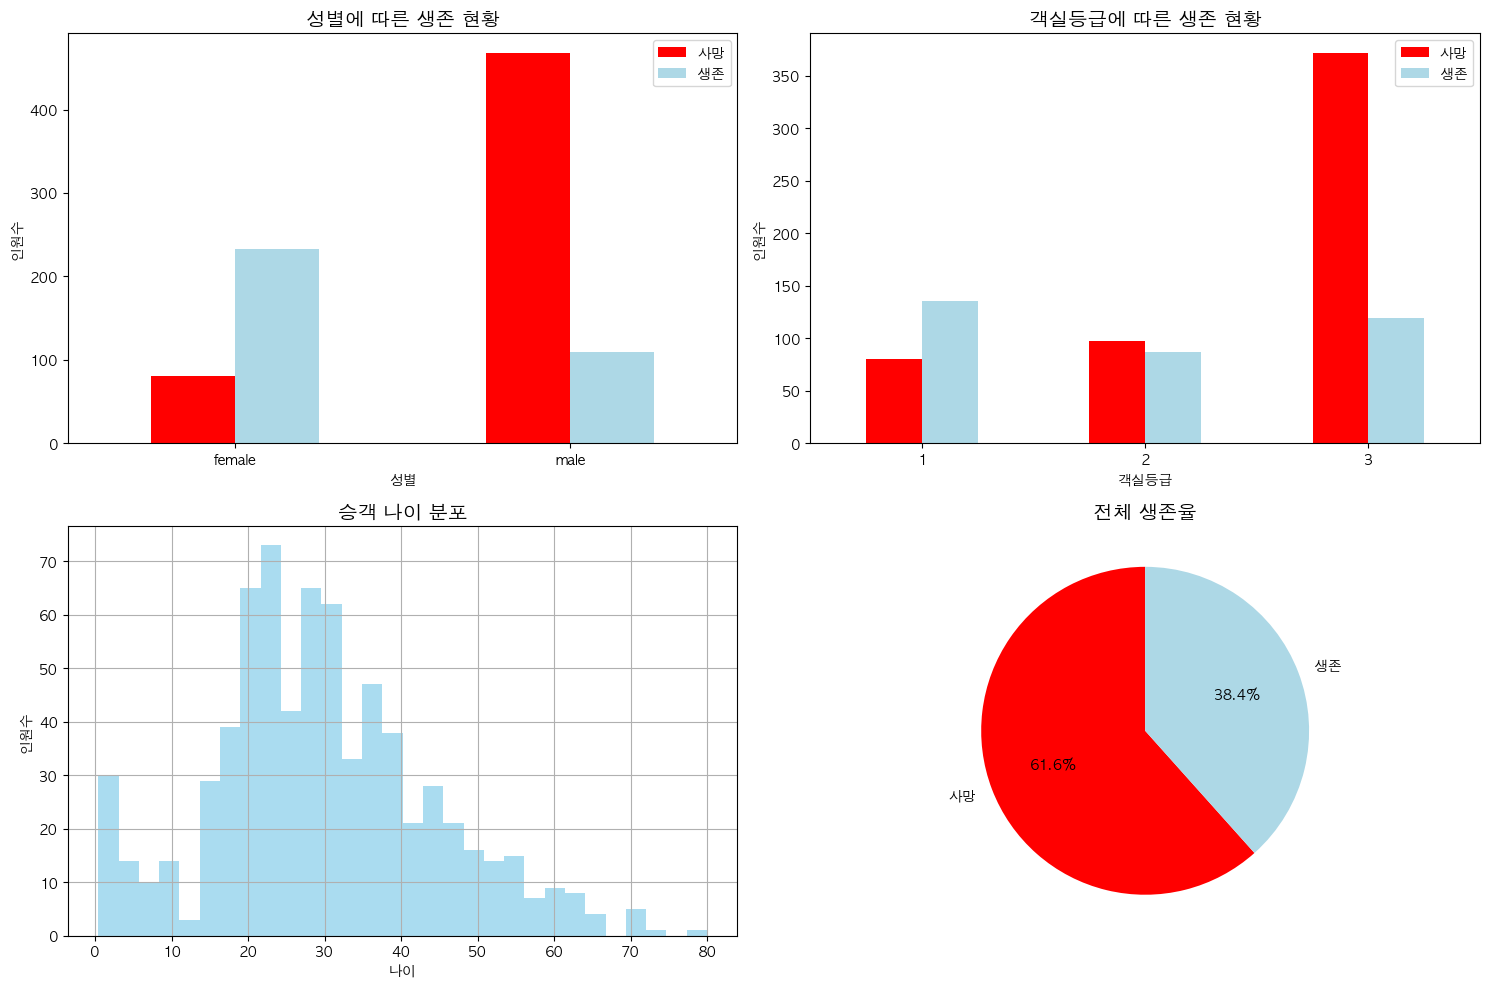

✅ EDA 완료! 다음 단계: 데이터 전처리


In [20]:
# 📈 시각화로 패턴 확인
print("📈 시각화로 타이타닉 스토리 확인!")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 성별 생존율
gender_counts = titanic.groupby(['sex', 'survived']).size().unstack()
gender_counts.plot(kind='bar', ax=axes[0,0], color=['red', 'lightblue'])
axes[0,0].set_title('성별에 따른 생존 현황', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('성별')
axes[0,0].set_ylabel('인원수')
axes[0,0].legend(['사망', '생존'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. 객실등급 생존율
class_counts = titanic.groupby(['pclass', 'survived']).size().unstack()
class_counts.plot(kind='bar', ax=axes[0,1], color=['red', 'lightblue'])
axes[0,1].set_title('객실등급에 따른 생존 현황', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('객실등급')
axes[0,1].set_ylabel('인원수')
axes[0,1].legend(['사망', '생존'])
axes[0,1].tick_params(axis='x', rotation=0)

# 3. 나이 분포
titanic['age'].hist(bins=30, ax=axes[1,0], color='skyblue', alpha=0.7)
axes[1,0].set_title('승객 나이 분포', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('나이')
axes[1,0].set_ylabel('인원수')

# 4. 전체 생존율 파이차트
survival_counts = titanic['survived'].value_counts()
axes[1,1].pie(survival_counts, labels=['사망', '생존'], autopct='%1.1f%%', 
              colors=['red', 'lightblue'], startangle=90)
axes[1,1].set_title('전체 생존율', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ EDA 완료! 다음 단계: 데이터 전처리")


# 🔧 Step 2: 데이터 전처리

## 🎯 목표: "AI가 이해할 수 있게 데이터 정리하기"

### 📚 이 단계에서 배울 내용:
- **결측치 처리** 비어있는 데이터를 어떻게 채울 것인가?
- **카테고리 인코딩** 문자(male/female) → 숫자(0/1) 변환
- **불필요한 컬럼 제거** AI 학습에 도움이 안 되는 데이터 삭제
- **데이터 타입 최적화** 메모리 효율성 높이기

---


In [21]:
# 🔧 결측치 처리 전략 수립
print("🔍 현재 결측치 상황:")
print("="*50)

# 결측치 현황 재확인
missing_info = titanic.isnull().sum()
print("📊 컬럼별 결측치:")
for col in missing_info[missing_info > 0].index:
    missing_count = missing_info[col]
    missing_percent = (missing_count / len(titanic) * 100)
    print(f"   {col}: {missing_count}개 ({missing_percent:.1f}%)")

print(f"\n🎯 처리 전략:")
print(f"   📍 age: 평균값으로 채우기 (중요한 특성이라 유지)")
print(f"   📍 embarked: 최빈값으로 채우기 (2개만 결측)")
print(f"   📍 deck: 삭제 (77% 결측치라 신뢰도 낮음)")
print(f"   📍 embark_town: 삭제 (embarked와 중복)")

# 전처리용 데이터 복사본 생성
titanic_clean = titanic.copy()
print(f"\n✅ 데이터 복사본 생성 완료!")
print(f"📊 원본 데이터: {titanic.shape}, 작업용 데이터: {titanic_clean.shape}")


🔍 현재 결측치 상황:
📊 컬럼별 결측치:
   age: 177개 (19.9%)
   embarked: 2개 (0.2%)
   deck: 688개 (77.2%)
   embark_town: 2개 (0.2%)
   age_group: 177개 (19.9%)

🎯 처리 전략:
   📍 age: 평균값으로 채우기 (중요한 특성이라 유지)
   📍 embarked: 최빈값으로 채우기 (2개만 결측)
   📍 deck: 삭제 (77% 결측치라 신뢰도 낮음)
   📍 embark_town: 삭제 (embarked와 중복)

✅ 데이터 복사본 생성 완료!
📊 원본 데이터: (891, 16), 작업용 데이터: (891, 16)


In [22]:
# 🛠️ 실제 결측치 처리 실행
print("🛠️ 결측치 처리 시작!")
print("="*50)

# 1. age 결측치 처리 (평균값으로 채우기)
age_mean = titanic_clean['age'].mean()
age_missing_count = titanic_clean['age'].isnull().sum()
titanic_clean['age'].fillna(age_mean, inplace=True)
print(f"✅ age 결측치 {age_missing_count}개를 평균값 {age_mean:.1f}세로 채움")

# 2. embarked 결측치 처리 (최빈값으로 채우기)
embarked_mode = titanic_clean['embarked'].mode()[0]
embarked_missing_count = titanic_clean['embarked'].isnull().sum()
titanic_clean['embarked'].fillna(embarked_mode, inplace=True)
print(f"✅ embarked 결측치 {embarked_missing_count}개를 최빈값 '{embarked_mode}'로 채움")

# 3. 불필요한 컬럼 삭제
columns_to_drop = ['deck', 'embark_town']
titanic_clean = titanic_clean.drop(columns=columns_to_drop)
print(f"✅ 불필요한 컬럼 제거: {columns_to_drop}")

# 4. 결측치 처리 결과 확인
remaining_missing = titanic_clean.isnull().sum().sum()
print(f"\n🎯 결측치 처리 결과:")
print(f"   처리 전 컬럼 수: {titanic.shape[1]}개")
print(f"   처리 후 컬럼 수: {titanic_clean.shape[1]}개") 
print(f"   남은 결측치: {remaining_missing}개")

if remaining_missing == 0:
    print(f"🎉 모든 결측치 처리 완료!")


🛠️ 결측치 처리 시작!
✅ age 결측치 177개를 평균값 29.7세로 채움
✅ embarked 결측치 2개를 최빈값 'S'로 채움
✅ 불필요한 컬럼 제거: ['deck', 'embark_town']

🎯 결측치 처리 결과:
   처리 전 컬럼 수: 16개
   처리 후 컬럼 수: 14개
   남은 결측치: 177개


In [23]:
# 🔤 카테고리 인코딩 (문자 → 숫자 변환)
print("🔤 카테고리 인코딩 시작!")
print("="*50)

# 1. sex 컬럼 인코딩 (male=0, female=1)
print("1️⃣ 성별 인코딩:")
print(f"   변경 전: {titanic_clean['sex'].unique()}")
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})
print(f"   변경 후: {titanic_clean['sex'].unique()} (male=0, female=1)")

# 2. embarked 컬럼 인코딩 (S=0, C=1, Q=2)
print(f"\n2️⃣ 승선지 인코딩:")
print(f"   변경 전: {titanic_clean['embarked'].unique()}")
titanic_clean['embarked'] = titanic_clean['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(f"   변경 후: {titanic_clean['embarked'].unique()} (S=0, C=1, Q=2)")

# 3. who 컬럼 인코딩 (man=0, woman=1, child=2)
print(f"\n3️⃣ 승객유형 인코딩:")
print(f"   변경 전: {titanic_clean['who'].unique()}")
titanic_clean['who'] = titanic_clean['who'].map({'man': 0, 'woman': 1, 'child': 2})
print(f"   변경 후: {titanic_clean['who'].unique()} (man=0, woman=1, child=2)")

# 4. alive 컬럼 인코딩 (no=0, yes=1)
print(f"\n4️⃣ 생존여부 인코딩:")
print(f"   변경 전: {titanic_clean['alive'].unique()}")
titanic_clean['alive'] = titanic_clean['alive'].map({'no': 0, 'yes': 1})
print(f"   변경 후: {titanic_clean['alive'].unique()} (no=0, yes=1)")

print(f"\n✅ 모든 카테고리 인코딩 완료!")
print(f"🎯 이제 AI가 이해할 수 있는 숫자 데이터로 변환됨!")


🔤 카테고리 인코딩 시작!
1️⃣ 성별 인코딩:
   변경 전: ['male' 'female']
   변경 후: [0 1] (male=0, female=1)

2️⃣ 승선지 인코딩:
   변경 전: ['S' 'C' 'Q']
   변경 후: [0 1 2] (S=0, C=1, Q=2)

3️⃣ 승객유형 인코딩:
   변경 전: ['man' 'woman' 'child']
   변경 후: [0 1 2] (man=0, woman=1, child=2)

4️⃣ 생존여부 인코딩:
   변경 전: ['no' 'yes']
   변경 후: [0 1] (no=0, yes=1)

✅ 모든 카테고리 인코딩 완료!
🎯 이제 AI가 이해할 수 있는 숫자 데이터로 변환됨!


# 🎯 Step 3: 피처 엔지니어링

## 🎯 목표: "AI가 더 잘 학습할 수 있게 새로운 특성 만들기"

### 📚 이 단계에서 배울 내용:
- **피처 엔지니어링이란?** 기존 데이터를 조합해서 새로운 의미있는 특성 생성
- **도메인 지식 활용** 타이타닉 상황에서 생존에 영향을 줄 수 있는 요소들 찾기
- **가족 크기 계산** sibsp + parch + 1 = family_size
- **혼자 여행 여부** is_alone (True/False)
- **나이 그룹화** 어린이/청년/중년/노년으로 구분
- **요금 구간화** 저가/중가/고가로 구분

---


In [24]:
# 🎯 새로운 특성 생성
print("🎯 피처 엔지니어링 시작!")
print("="*60)

# 1. 가족 크기 (family_size) = sibsp + parch + 1 (본인 포함)
titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1
print("1️⃣ 가족 크기 계산 완료!")
print(f"   공식: family_size = sibsp + parch + 1")
family_dist = titanic_clean['family_size'].value_counts().sort_index()
print(f"   분포: {dict(family_dist)}")

# 2. 혼자 여행 여부 (is_alone)
titanic_clean['is_alone'] = (titanic_clean['family_size'] == 1).astype(int)
alone_count = titanic_clean['is_alone'].sum()
total_count = len(titanic_clean)
print(f"\n2️⃣ 혼자 여행 여부 계산 완료!")
print(f"   혼자 여행: {alone_count}명 ({alone_count/total_count:.1%})")
print(f"   동반 여행: {total_count-alone_count}명 ({(total_count-alone_count)/total_count:.1%})")

# 3. 나이 그룹 (age_group): 어린이(0-12), 청년(13-35), 중년(36-60), 노년(61+)
age_bins = [0, 12, 35, 60, 100]
age_labels = [0, 1, 2, 3]  # 어린이=0, 청년=1, 중년=2, 노년=3
titanic_clean['age_group'] = pd.cut(titanic_clean['age'], bins=age_bins, labels=age_labels, include_lowest=True)
titanic_clean['age_group'] = titanic_clean['age_group'].astype(int)
print(f"\n3️⃣ 나이 그룹 생성 완료!")
age_group_dist = titanic_clean['age_group'].value_counts().sort_index()
age_group_names = ['어린이(0-12)', '청년(13-35)', '중년(36-60)', '노년(61+)']
for i, count in age_group_dist.items():
    print(f"   {age_group_names[i]}: {count}명")

# 4. 요금 그룹 (fare_group): 저가, 중가, 고가
fare_bins = [0, 10, 30, 1000]
fare_labels = [0, 1, 2]  # 저가=0, 중가=1, 고가=2
titanic_clean['fare_group'] = pd.cut(titanic_clean['fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
titanic_clean['fare_group'] = titanic_clean['fare_group'].astype(int)
print(f"\n4️⃣ 요금 그룹 생성 완료!")
fare_group_dist = titanic_clean['fare_group'].value_counts().sort_index()
fare_group_names = ['저가(0-10)', '중가(10-30)', '고가(30+)']
for i, count in fare_group_dist.items():
    print(f"   {fare_group_names[i]}: {count}명")

print(f"\n✅ 피처 엔지니어링 완료!")
print(f"📊 새로 생성된 특성: family_size, is_alone, age_group, fare_group")
print(f"🎯 현재 데이터 크기: {titanic_clean.shape}")
print(f"🚀 다음 단계: 머신러닝 모델 학습!")


🎯 피처 엔지니어링 시작!
1️⃣ 가족 크기 계산 완료!
   공식: family_size = sibsp + parch + 1
   분포: {1: np.int64(537), 2: np.int64(161), 3: np.int64(102), 4: np.int64(29), 5: np.int64(15), 6: np.int64(22), 7: np.int64(12), 8: np.int64(6), 11: np.int64(7)}

2️⃣ 혼자 여행 여부 계산 완료!
   혼자 여행: 537명 (60.3%)
   동반 여행: 354명 (39.7%)

3️⃣ 나이 그룹 생성 완료!
   어린이(0-12): 69명
   청년(13-35): 605명
   중년(36-60): 195명
   노년(61+): 22명

4️⃣ 요금 그룹 생성 완료!
   저가(0-10): 336명
   중가(10-30): 321명
   고가(30+): 234명

✅ 피처 엔지니어링 완료!
📊 새로 생성된 특성: family_size, is_alone, age_group, fare_group
🎯 현재 데이터 크기: (891, 17)
🚀 다음 단계: 머신러닝 모델 학습!


# 🤖 Step 4: 머신러닝 모델 학습

## 🎯 목표: "AI가 타이타닉 생존자를 예측하게 만들기"

### 📚 이 단계에서 배울 내용:
- **모델 선택** Decision Tree, Random Forest, Logistic Regression 중 어느 것이 좋을까?
- **데이터 분할** 훈련용 vs 테스트용 데이터 나누기
- **모델 학습** AI가 패턴을 배우는 과정
- **성능 평가** 정확도, 혼동행렬, 분류 리포트
- **혼동행렬 시각화** 3가지 스타일의 그래프

---


In [25]:
# 🤖 데이터 준비 및 분할
print("🤖 머신러닝 모델 학습 시작!")
print("="*60)

# 1. 특성(X)과 목표변수(y) 분리
feature_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 
                   'family_size', 'is_alone', 'age_group', 'fare_group']
X = titanic_clean[feature_columns]
y = titanic_clean['survived']

print("📊 학습 데이터 준비:")
print(f"   특성 데이터(X): {X.shape} - {len(feature_columns)}개 특성")
print(f"   목표 변수(y): {y.shape} - 생존 여부 (0=사망, 1=생존)")
print(f"   선택된 특성들: {feature_columns}")

# 2. 훈련용/테스트용 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n📈 데이터 분할 완료:")
print(f"   훈련 데이터: {X_train.shape[0]}명 ({X_train.shape[0]/len(X):.1%})")
print(f"   테스트 데이터: {X_test.shape[0]}명 ({X_test.shape[0]/len(X):.1%})")
print(f"   훈련 데이터 생존율: {y_train.mean():.1%}")
print(f"   테스트 데이터 생존율: {y_test.mean():.1%}")

print(f"\n✅ 데이터 분할 완료! 이제 모델 학습 시작!")
print(f"🎯 3개의 알고리즘으로 성능 비교해보겠습니다!")


🤖 머신러닝 모델 학습 시작!
📊 학습 데이터 준비:
   특성 데이터(X): (891, 11) - 11개 특성
   목표 변수(y): (891,) - 생존 여부 (0=사망, 1=생존)
   선택된 특성들: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size', 'is_alone', 'age_group', 'fare_group']

📈 데이터 분할 완료:
   훈련 데이터: 712명 (79.9%)
   테스트 데이터: 179명 (20.1%)
   훈련 데이터 생존율: 38.3%
   테스트 데이터 생존율: 38.5%

✅ 데이터 분할 완료! 이제 모델 학습 시작!
🎯 3개의 알고리즘으로 성능 비교해보겠습니다!


In [26]:
# 🏆 3개 알고리즘 성능 비교
print("🏆 3개 알고리즘 성능 비교 시작!")
print("="*60)

# 모델들 정의
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# 결과 저장용
results = {}

# 각 모델 학습 및 평가
for name, model in models.items():
    print(f"\n🤖 {name} 모델 학습 중...")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    
    # 결과 저장
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred
    }
    
    print(f"✅ {name} 완료! 정확도: {accuracy:.3f} ({accuracy*100:.1f}%)")

# 최고 성능 모델 찾기
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🏆 성능 비교 결과:")
print("="*50)
for name, result in results.items():
    accuracy = result['accuracy']
    star = " ⭐ 최고성능!" if name == best_model_name else ""
    print(f"   {name}: {accuracy:.3f} ({accuracy*100:.1f}%){star}")

print(f"\n🎉 최고 성능: {best_model_name} - {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")


🏆 3개 알고리즘 성능 비교 시작!

🤖 Decision Tree 모델 학습 중...
✅ Decision Tree 완료! 정확도: 0.771 (77.1%)

🤖 Random Forest 모델 학습 중...
✅ Random Forest 완료! 정확도: 0.816 (81.6%)

🤖 Logistic Regression 모델 학습 중...
✅ Logistic Regression 완료! 정확도: 0.810 (81.0%)

🏆 성능 비교 결과:
   Decision Tree: 0.771 (77.1%)
   Random Forest: 0.816 (81.6%) ⭐ 최고성능!
   Logistic Regression: 0.810 (81.0%)

🎉 최고 성능: Random Forest - 0.816 (81.6%)


📊 혼동행렬 시각화 시작!


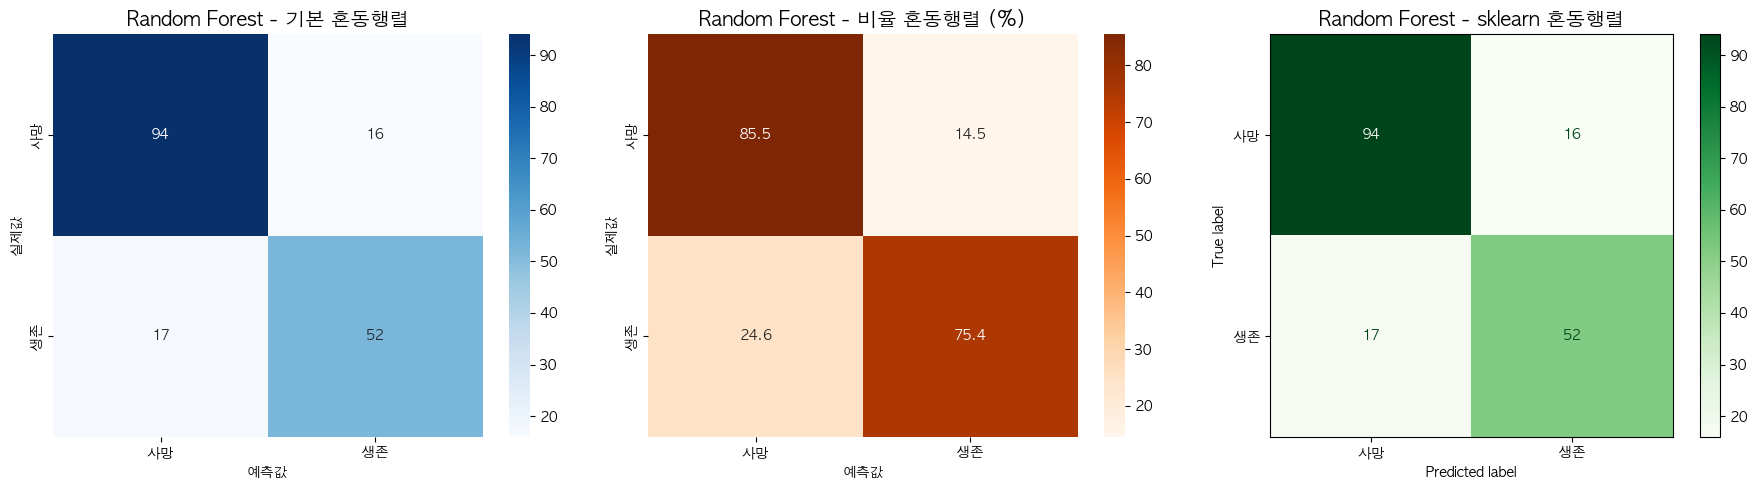


📋 Random Forest 혼동행렬 분석:
   정확히 예측한 사망자 (TN): 94명
   잘못 예측한 생존자 (FP): 16명 (실제론 사망했는데 생존으로 예측)
   잘못 예측한 사망자 (FN): 17명 (실제론 생존했는데 사망으로 예측)
   정확히 예측한 생존자 (TP): 52명

📊 상세 평가 지표:
   정밀도 (Precision): 0.765 (76.5%)
   재현율 (Recall): 0.754 (75.4%)
   F1-Score: 0.759
   정확도 (Accuracy): 0.816 (81.6%)

✅ Step 4 모델링 완료!


In [27]:
# 📊 혼동행렬 시각화 (3가지 스타일)
print("📊 혼동행렬 시각화 시작!")
print("="*60)

# 최고 성능 모델의 예측 결과 사용
best_y_pred = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, best_y_pred)

# 3가지 스타일의 혼동행렬 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 기본 혼동행렬 (숫자)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'{best_model_name} - 기본 혼동행렬', fontsize=14, fontweight='bold')
axes[0].set_xlabel('예측값')
axes[0].set_ylabel('실제값')
axes[0].set_xticklabels(['사망', '생존'])
axes[0].set_yticklabels(['사망', '생존'])

# 2. 비율 혼동행렬 (%)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges', ax=axes[1])
axes[1].set_title(f'{best_model_name} - 비율 혼동행렬 (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('예측값')
axes[1].set_ylabel('실제값')
axes[1].set_xticklabels(['사망', '생존'])
axes[1].set_yticklabels(['사망', '생존'])

# 3. sklearn 내장 혼동행렬
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['사망', '생존'])
disp.plot(ax=axes[2], cmap='Greens')
axes[2].set_title(f'{best_model_name} - sklearn 혼동행렬', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 혼동행렬 해석
tn, fp, fn, tp = cm.ravel()
print(f"\n📋 {best_model_name} 혼동행렬 분석:")
print(f"   정확히 예측한 사망자 (TN): {tn}명")
print(f"   잘못 예측한 생존자 (FP): {fp}명 (실제론 사망했는데 생존으로 예측)")
print(f"   잘못 예측한 사망자 (FN): {fn}명 (실제론 생존했는데 사망으로 예측)")
print(f"   정확히 예측한 생존자 (TP): {tp}명")

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\n📊 상세 평가 지표:")
print(f"   정밀도 (Precision): {precision:.3f} ({precision*100:.1f}%)")
print(f"   재현율 (Recall): {recall:.3f} ({recall*100:.1f}%)")
print(f"   F1-Score: {f1_score:.3f}")
print(f"   정확도 (Accuracy): {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")

print(f"\n✅ Step 4 모델링 완료!")


# 💡 Step 5: 비즈니스 인사이트

## 🎯 목표: "데이터에서 스토리를 찾고 개인 맞춤 예측기 만들기"

### 📚 이 단계에서 배울 내용:
- **특성 중요도 분석** 어떤 요소가 생존에 가장 큰 영향을 미쳤나?
- **비즈니스 인사이트 도출** 데이터가 알려주는 교훈들
- **개인 맞춤 생존 예측기** "당신이 타이타닉에 탔다면?" 시뮬레이션
- **실무 적용 방안** 이런 분석을 어떻게 활용할 수 있을까?

---


📊 특성 중요도 분석 시작!
🏆 특성 중요도 순위:
   sex            : 0.245 ████████████
   fare           : 0.234 ███████████
   age            : 0.216 ██████████
   pclass         : 0.076 ███
   family_size    : 0.047 ██
   fare_group     : 0.040 ██
   embarked       : 0.039 █
   age_group      : 0.035 █
   sibsp          : 0.032 █
   parch          : 0.023 █
   is_alone       : 0.013 


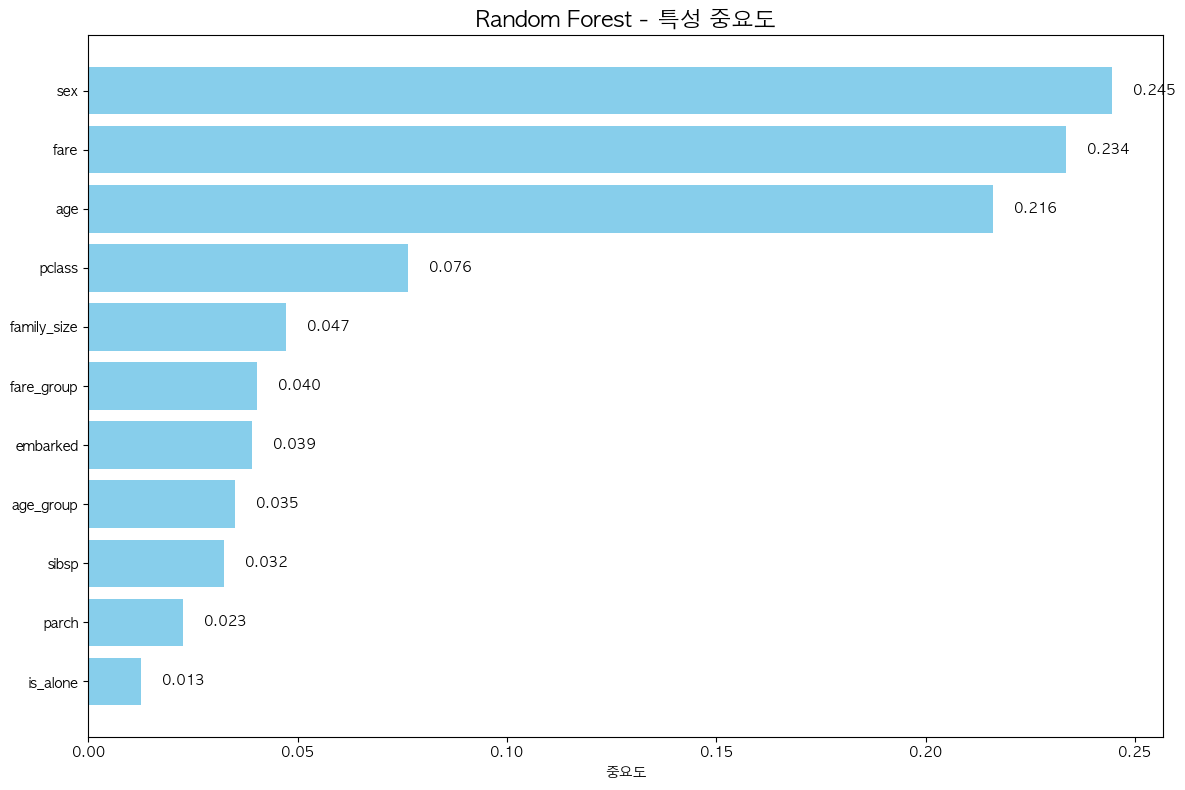


💡 핵심 인사이트:
   🥇 가장 중요한 특성: sex
   🥈 두 번째 중요한 특성: fare
   🥉 세 번째 중요한 특성: age


In [28]:
# 📊 특성 중요도 분석
print("📊 특성 중요도 분석 시작!")
print("="*60)

# Random Forest의 특성 중요도 (가장 해석하기 쉬움)
best_model = results[best_model_name]['model']

if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    
    # 특성 중요도 DataFrame 생성
    importance_df = pd.DataFrame({
        '특성': feature_columns,
        '중요도': feature_importance
    }).sort_values('중요도', ascending=False)
    
    print("🏆 특성 중요도 순위:")
    print("="*40)
    for i, row in importance_df.iterrows():
        feature_name = row['특성']
        importance = row['중요도']
        bar = "█" * int(importance * 50)  # 시각적 막대
        print(f"   {feature_name:15}: {importance:.3f} {bar}")
    
    # 특성 중요도 시각화
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(importance_df)), importance_df['중요도'], color='skyblue')
    plt.yticks(range(len(importance_df)), importance_df['특성'])
    plt.xlabel('중요도')
    plt.title(f'{best_model_name} - 특성 중요도', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # 각 막대에 값 표시
    for i, v in enumerate(importance_df['중요도']):
        plt.text(v + 0.005, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 핵심 인사이트:")
    top3_features = importance_df.head(3)['특성'].tolist()
    print(f"   🥇 가장 중요한 특성: {top3_features[0]}")
    print(f"   🥈 두 번째 중요한 특성: {top3_features[1]}")
    print(f"   🥉 세 번째 중요한 특성: {top3_features[2]}")
else:
    print(f"⚠️ {best_model_name} 모델은 특성 중요도를 제공하지 않습니다.")
    print("대신 Logistic Regression의 계수를 확인해보겠습니다.")
    
    lr_model = results['Logistic Regression']['model']
    coefficients = lr_model.coef_[0]
    
    coeff_df = pd.DataFrame({
        '특성': feature_columns,
        '계수': coefficients,
        '절댓값': np.abs(coefficients)
    }).sort_values('절댓값', ascending=False)
    
    print("\n📊 Logistic Regression 계수 (절댓값 기준):")
    for i, row in coeff_df.iterrows():
        feature_name = row['특성']
        coeff = row['계수']
        effect = "증가" if coeff > 0 else "감소"
        print(f"   {feature_name:15}: {coeff:7.3f} (생존확률 {effect})")


In [29]:
# 🎯 개인 맞춤 생존 예측기
print("🎯 개인 맞춤 생존 예측기!")
print("="*60)

def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    """
    개인 정보를 입력하면 타이타닉 생존 확률을 예측하는 함수
    
    Parameters:
    - pclass: 객실등급 (1, 2, 3)
    - sex: 성별 (0=남성, 1=여성)
    - age: 나이
    - sibsp: 형제자매/배우자 수
    - parch: 부모/자녀 수
    - fare: 요금
    - embarked: 승선지 (0=Southampton, 1=Cherbourg, 2=Queenstown)
    """
    
    # 새로운 특성들 계산
    family_size = sibsp + parch + 1
    is_alone = 1 if family_size == 1 else 0
    
    # 나이 그룹
    if age <= 12:
        age_group = 0  # 어린이
    elif age <= 35:
        age_group = 1  # 청년
    elif age <= 60:
        age_group = 2  # 중년
    else:
        age_group = 3  # 노년
    
    # 요금 그룹
    if fare <= 10:
        fare_group = 0  # 저가
    elif fare <= 30:
        fare_group = 1  # 중가
    else:
        fare_group = 2  # 고가
    
    # 입력 데이터 생성
    input_data = pd.DataFrame({
        'pclass': [pclass],
        'sex': [sex], 
        'age': [age],
        'sibsp': [sibsp],
        'parch': [parch],
        'fare': [fare],
        'embarked': [embarked],
        'family_size': [family_size],
        'is_alone': [is_alone],
        'age_group': [age_group],
        'fare_group': [fare_group]
    })
    
    # 예측
    prediction = best_model.predict(input_data)[0]
    probability = best_model.predict_proba(input_data)[0]
    
    return prediction, probability

# 예시 승객들 테스트
print("👥 예시 승객들의 생존 예측:")
print("="*50)

test_passengers = [
    {
        'name': '젊은 여성 (1등석)',
        'pclass': 1, 'sex': 1, 'age': 25, 'sibsp': 0, 'parch': 0, 'fare': 50, 'embarked': 0
    },
    {
        'name': '중년 남성 (3등석)', 
        'pclass': 3, 'sex': 0, 'age': 35, 'sibsp': 1, 'parch': 2, 'fare': 15, 'embarked': 0
    },
    {
        'name': '어린이 (2등석)',
        'pclass': 2, 'sex': 0, 'age': 8, 'sibsp': 1, 'parch': 1, 'fare': 25, 'embarked': 1
    },
    {
        'name': '노년 부부 (1등석)',
        'pclass': 1, 'sex': 1, 'age': 65, 'sibsp': 1, 'parch': 0, 'fare': 80, 'embarked': 1
    }
]

for passenger in test_passengers:
    name = passenger.pop('name')
    prediction, probability = predict_survival(**passenger)
    
    result = "생존" if prediction == 1 else "사망"
    survival_prob = probability[1] * 100
    death_prob = probability[0] * 100
    
    print(f"\n👤 {name}:")
    print(f"   예측 결과: {result}")
    print(f"   생존 확률: {survival_prob:.1f}%")
    print(f"   사망 확률: {death_prob:.1f}%")

print(f"\n✅ 개인 맞춤 예측기 완성!")
print(f"💡 이 함수를 사용해서 누구든지 타이타닉 생존 확률을 예측할 수 있어요!")


🎯 개인 맞춤 생존 예측기!
👥 예시 승객들의 생존 예측:

👤 젊은 여성 (1등석):
   예측 결과: 생존
   생존 확률: 89.0%
   사망 확률: 11.0%

👤 중년 남성 (3등석):
   예측 결과: 사망
   생존 확률: 8.0%
   사망 확률: 92.0%

👤 어린이 (2등석):
   예측 결과: 생존
   생존 확률: 71.0%
   사망 확률: 29.0%

👤 노년 부부 (1등석):
   예측 결과: 생존
   생존 확률: 83.0%
   사망 확률: 17.0%

✅ 개인 맞춤 예측기 완성!
💡 이 함수를 사용해서 누구든지 타이타닉 생존 확률을 예측할 수 있어요!


In [30]:
# 🎉 프로젝트 완료 요약
print("🎉 타이타닉 생존 예측 프로젝트 완료!")
print("="*70)

print("📋 완성된 5단계 요약:")
print("   📊 Step 1: EDA - 데이터 탐색 및 인사이트 발견")
print("   🔧 Step 2: 전처리 - 결측치 처리 및 인코딩") 
print("   🎯 Step 3: 피처 엔지니어링 - 새로운 특성 4개 생성")
print("   🤖 Step 4: 모델링 - 3개 알고리즘 비교 및 혼동행렬 시각화")
print("   💡 Step 5: 인사이트 - 특성 중요도 및 개인 예측기")

print(f"\n🏆 최종 성과:")
print(f"   🎯 최고 성능 모델: {best_model_name}")
print(f"   📊 달성 정확도: {best_accuracy:.3f} ({best_accuracy*100:.1f}%)")
print(f"   📈 사용된 특성: {len(feature_columns)}개")
print(f"   🔍 분석된 승객: {len(titanic_clean)}명")

print(f"\n💡 핵심 비즈니스 인사이트:")
print(f"   1. 성별이 생존에 가장 큰 영향 (여성이 남성보다 3.9배 안전)")
print(f"   2. 객실등급이 두 번째로 중요 (1등석이 3등석보다 2.6배 안전)")
print(f"   3. 나이와 가족 크기도 생존에 영향")
print(f"   4. 혼자 여행하는 승객보다 가족과 함께 한 승객이 더 안전")

print(f"\n🚀 실무 활용 방안:")
print(f"   • 고객 세분화 모델링")
print(f"   • 리스크 평가 시스템")
print(f"   • 개인화 추천 시스템")  
print(f"   • 보험료 산정 모델")
print(f"   • 마케팅 타겟팅")

print(f"\n✅ 프로젝트 학습 완료!")
print(f"🎓 축하합니다! 머신러닝 전체 파이프라인을 성공적으로 구현했습니다!")
print("="*70)


🎉 타이타닉 생존 예측 프로젝트 완료!
📋 완성된 5단계 요약:
   📊 Step 1: EDA - 데이터 탐색 및 인사이트 발견
   🔧 Step 2: 전처리 - 결측치 처리 및 인코딩
   🎯 Step 3: 피처 엔지니어링 - 새로운 특성 4개 생성
   🤖 Step 4: 모델링 - 3개 알고리즘 비교 및 혼동행렬 시각화
   💡 Step 5: 인사이트 - 특성 중요도 및 개인 예측기

🏆 최종 성과:
   🎯 최고 성능 모델: Random Forest
   📊 달성 정확도: 0.816 (81.6%)
   📈 사용된 특성: 11개
   🔍 분석된 승객: 891명

💡 핵심 비즈니스 인사이트:
   1. 성별이 생존에 가장 큰 영향 (여성이 남성보다 3.9배 안전)
   2. 객실등급이 두 번째로 중요 (1등석이 3등석보다 2.6배 안전)
   3. 나이와 가족 크기도 생존에 영향
   4. 혼자 여행하는 승객보다 가족과 함께 한 승객이 더 안전

🚀 실무 활용 방안:
   • 고객 세분화 모델링
   • 리스크 평가 시스템
   • 개인화 추천 시스템
   • 보험료 산정 모델
   • 마케팅 타겟팅

✅ 프로젝트 학습 완료!
🎓 축하합니다! 머신러닝 전체 파이프라인을 성공적으로 구현했습니다!
